In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [459]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [461]:
df['text'].head() #checking how text look like

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [462]:
df['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [463]:
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


C:\Users\e175932\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

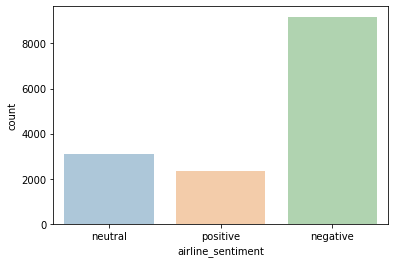

In [464]:
sns.countplot(df['airline_sentiment'], alpha = 0.4)

In [465]:
df['target'] = df['airline_sentiment'].apply(lambda x: 2 if x == 'positive' else 1 if x == 'neutral'else 0)
df.head()

,text,airline_sentiment,target
0,@VirginAmerica What @dhepburn said.,neutral,1
1,@VirginAmerica plus you've added commercials t...,positive,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [466]:
X = df['text']
y = df['target']
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df)

In [467]:
df_train.head()

,text,airline_sentiment,target
10404,@USAirways you can send my luggage to my house👋,negative,0
8130,@JetBlue U said 15mins to Take Off and now we ...,negative,0
13485,"@AmericanAir Its the ABC's of PR, let your cus...",negative,0
7780,@JetBlue great flight http://t.co/E0R0NTO4TR,positive,2
7783,@JetBlue I would like to send an email to Lost...,negative,0


In [468]:
df_train.shape

(10980, 3)

### 1. Fitting model with TF-IDF only

**Logistic Regression**

In [469]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize1 = TfidfVectorizer()
X_train = vectorize1.fit_transform(df_train['text'])
X_train.shape

(10980, 12667)

In [470]:
X_test = vectorize1.transform(df_test['text'])
y_train = df_train['target']
y_test = df_test['target']

In [471]:
glm = LogisticRegression(max_iter=500)
glm.fit(X_train, y_train)
pred1 = glm.predict_proba(X_test)


In [472]:
print(glm.score(X_test, y_test))

0.7980874316939891


In [473]:
p_pred1 = glm.predict(X_test)
cm1 = metrics.confusion_matrix(y_test, p_pred1, normalize='true')
cm1

array([[0.94573304, 0.04113786, 0.0131291 ],
       [0.41898734, 0.50632911, 0.07468354],
       [0.26495726, 0.11965812, 0.61538462]])

In [474]:
print("AUC: ", metrics.roc_auc_score(y_test, pred1, multi_class='ovo'))

AUC:  0.8927651457491083


In [475]:
print(metrics.classification_report(y_test, p_pred1))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2285
           1       0.71      0.51      0.59       790
           2       0.80      0.62      0.70       585

    accuracy                           0.80      3660
   macro avg       0.78      0.69      0.72      3660
weighted avg       0.79      0.80      0.79      3660



In [476]:
print(pred1.shape, p_pred1.shape)

(3660, 3) (3660,)


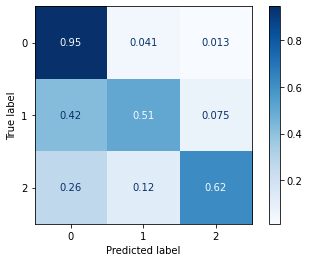

In [477]:
metrics.plot_confusion_matrix(glm, X_test, y_test, normalize= 'true', cmap='Blues' )  

### 2. Fitting Model with Punctuation Remove, Stopword Remove, Lemmatization

In [440]:
import nltk
from nltk.stem import WordNetLemmatizer

In [441]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e175932\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e175932\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [442]:
def text_analyze(mess):
#     1. Remove all punctuation
        punc_remove = [char for char in mess if char not in string.punctuation ]
        nopunc = "".join(punc_remove)
        
#     2. Remove all stopwords
        sw_remove = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
        
        #3. lemmatize
        return  " ".join([lemmatizer.lemmatize(w) for w in sw_remove])
        

In [443]:
# #test text_analyzie
string1 = "say something i'm giving up on you, sorry, that I couldn't get to you"
text_analyze(string1)

'say something im giving sorry couldnt get'

In [444]:
d_train = df_train['text'].apply(text_analyze)
d_test =  df_test['text'].apply(text_analyze)

In [445]:
vectorize =  TfidfVectorizer()
X_train = vectorize.fit_transform(d_train)
X_test = vectorize.transform(d_test)

In [446]:
glm2 = LogisticRegression(max_iter=500)
glm2.fit(X_train, y_train)
pred1 = glm2.predict_proba(X_test)
print(glm2.score(X_test, y_test))

0.7904371584699453


In [447]:
pred2 = glm2.predict(X_test)
p_pred2 = glm2.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred2, multi_class='ovo'))
print(metrics.classification_report(y_test, pred2))

AUC:  0.8902371096208651
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.68      0.51      0.58       785
           2       0.78      0.61      0.68       589

    accuracy                           0.79      3660
   macro avg       0.76      0.68      0.71      3660
weighted avg       0.78      0.79      0.78      3660



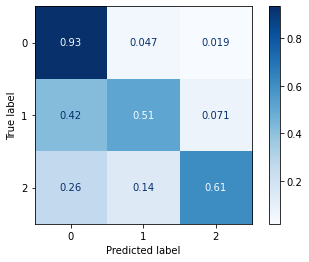

In [448]:
metrics.plot_confusion_matrix(glm2, X_test, y_test, normalize= 'true', cmap='Blues' )  

***The performance of the model did not improve after applying Punctuation Remove, Stopword Remove, Lemmatization and TF-IDF. Thees methods do not help in this case.***

### 3. Fitting model with RandomForest and XGBOOST

**Random Forest**

In [449]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(df_train['text'])
X_test = vectorize.transform(df_test['text'])
rf = RandomForestClassifier( )
rf.fit(X_train,y_train)
print(rf.score(X_test, y_test))

0.7543715846994535


In [450]:
pred3 = rf.predict(X_test)
p_pred3 = rf.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred3, multi_class='ovo'))
print(metrics.classification_report(y_test, pred3))

AUC:  0.857986826020709
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      2286
           1       0.71      0.39      0.50       785
           2       0.82      0.42      0.55       589

    accuracy                           0.75      3660
   macro avg       0.76      0.59      0.64      3660
weighted avg       0.75      0.75      0.73      3660



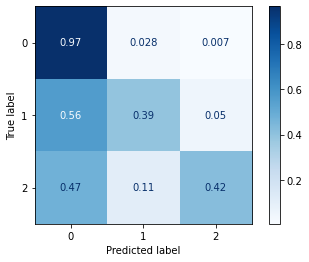

In [451]:
metrics.plot_confusion_matrix(rf, X_test, y_test, normalize= 'true', cmap='Blues' )  

**Xgboost**

In [452]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error

    
clf = xgb.XGBClassifier(
    n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx'
)   

In [453]:
clf.fit(X_train, y_train)

[12:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [454]:
pred4 = clf.predict(X_test)
#p_pred4 =clf.predict_proba(X_test)
#print("AUC: ", metrics.roc_auc_score(y_test, p_pred4, multi_class='ovo'))
print(metrics.classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2286
           1       0.67      0.56      0.61       785
           2       0.78      0.63      0.70       589

    accuracy                           0.79      3660
   macro avg       0.76      0.70      0.73      3660
weighted avg       0.79      0.79      0.79      3660



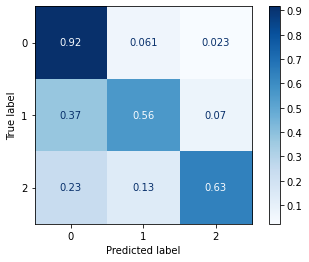

In [455]:
metrics.plot_confusion_matrix(clf, X_test, y_test, normalize= 'true', cmap='Blues' )  

### Play with result

In [488]:
decode_map = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

def predict_text(text):
    text = [text]
    # Tokenize text
    x_test = vectorize1.transform(text)
    # Predict
    score = glm.predict(x_test)
    # Decode sentiment
    label = decode_sentiment(score)
    return {"label": label}  

In [489]:
predict_text("I love the music")

{'label': 'POSITIVE'}

In [490]:
predict_text("I hate waiting")

{'label': 'NEGATIVE'}

In [491]:
predict_text("just give me a reason just a little bit enough")

{'label': 'NEGATIVE'}